In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Download dataset
# !curl -O https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv

In [64]:
# Import library

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [65]:
# Read dataset
covid = pd.read_csv("coronavirus.csv")
covid

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
0,2020-01-22,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
1,2020-01-23,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
2,2020-01-24,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
3,2020-01-25,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
4,2020-01-26,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919303,2022-12-31,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
919304,2023-01-01,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
919305,2023-01-02,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
919306,2023-01-03,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF


In [66]:
# Check data type from each column

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919308 entries, 0 to 919307
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            919308 non-null  object 
 1   province        277303 non-null  object 
 2   country         919308 non-null  object 
 3   lat             913913 non-null  float64
 4   long            913913 non-null  float64
 5   type            919308 non-null  object 
 6   cases           919308 non-null  int64  
 7   uid             884780 non-null  float64
 8   iso2            871832 non-null  object 
 9   iso3            875069 non-null  object 
 10  code3           875069 non-null  float64
 11  combined_key    884780 non-null  object 
 12  population      867516 non-null  float64
 13  continent_name  875069 non-null  object 
 14  continent_code  718614 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 105.2+ MB


In [67]:
# Check columns that has null values

covid.isnull().any()

date              False
province           True
country           False
lat                True
long               True
type              False
cases             False
uid                True
iso2               True
iso3               True
code3              True
combined_key       True
population         True
continent_name     True
continent_code     True
dtype: bool

In [68]:
# Check total null values in each columns

covid.isnull().sum()

date                   0
province          642005
country                0
lat                 5395
long                5395
type                   0
cases                  0
uid                34528
iso2               47476
iso3               44239
code3              44239
combined_key       34528
population         51792
continent_name     44239
continent_code    200694
dtype: int64

In [69]:
# Fill null values from column 'lat' and 'long' to 0

covid['lat'] = covid['lat'].fillna(0)
covid['long'] = covid['long'].fillna(0)

In [70]:
# Create new columns 'month' and 'year' from column 'date'

covid['month'] = pd.to_datetime(covid['date']).dt.month_name()
covid['year'] = pd.to_datetime(covid['date']).dt.year

In [71]:
covid.head(3)

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
0,2020-01-22,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
1,2020-01-23,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
2,2020-01-24,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020


***Subsetting data "Confirmed"***

In [72]:
confirmed = covid[covid["type"]=="confirmed"]
confirmed

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
0,2020-01-22,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
1,2020-01-23,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
2,2020-01-24,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
3,2020-01-25,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
4,2020-01-26,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311826,2022-12-31,NaN,Zimbabwe,-19.015438,29.154857,confirmed,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,December,2022
311827,2023-01-01,NaN,Zimbabwe,-19.015438,29.154857,confirmed,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023
311828,2023-01-02,NaN,Zimbabwe,-19.015438,29.154857,confirmed,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023
311829,2023-01-03,NaN,Zimbabwe,-19.015438,29.154857,confirmed,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023


***Subsetting data "Death"***

In [73]:
death = covid[covid["type"]=="death"]
death

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
311831,2020-01-22,Alberta,Canada,53.933300,-116.576500,death,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
311832,2020-01-23,Alberta,Canada,53.933300,-116.576500,death,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
311833,2020-01-24,Alberta,Canada,53.933300,-116.576500,death,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
311834,2020-01-25,Alberta,Canada,53.933300,-116.576500,death,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
311835,2020-01-26,Alberta,Canada,53.933300,-116.576500,death,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623657,2022-12-31,NaN,Zimbabwe,-19.015438,29.154857,death,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,December,2022
623658,2023-01-01,NaN,Zimbabwe,-19.015438,29.154857,death,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023
623659,2023-01-02,NaN,Zimbabwe,-19.015438,29.154857,death,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023
623660,2023-01-03,NaN,Zimbabwe,-19.015438,29.154857,death,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023


***Subsetting data "Recovery"***

In [74]:
recovered = covid[covid["type"]=="recovery"]
recovered

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
623662,2020-01-22,Anguilla,United Kingdom,18.220600,-63.068600,recovery,0,660.0,AI,AIA,660.0,"Anguilla, United Kingdom",15002.0,North America,NaN,January,2020
623663,2020-01-23,Anguilla,United Kingdom,18.220600,-63.068600,recovery,0,660.0,AI,AIA,660.0,"Anguilla, United Kingdom",15002.0,North America,NaN,January,2020
623664,2020-01-24,Anguilla,United Kingdom,18.220600,-63.068600,recovery,0,660.0,AI,AIA,660.0,"Anguilla, United Kingdom",15002.0,North America,NaN,January,2020
623665,2020-01-25,Anguilla,United Kingdom,18.220600,-63.068600,recovery,0,660.0,AI,AIA,660.0,"Anguilla, United Kingdom",15002.0,North America,NaN,January,2020
623666,2020-01-26,Anguilla,United Kingdom,18.220600,-63.068600,recovery,0,660.0,AI,AIA,660.0,"Anguilla, United Kingdom",15002.0,North America,NaN,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919303,2022-12-31,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,December,2022
919304,2023-01-01,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023
919305,2023-01-02,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023
919306,2023-01-03,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF,January,2023


***Subsetting data covid in Indonesia***

In [75]:
indonesia = covid[covid["country"]=="Indonesia"]
indonesia

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
182351,2020-01-22,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182352,2020-01-23,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182353,2020-01-24,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182354,2020-01-25,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182355,2020-01-26,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790902,2022-12-31,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2022
790903,2023-01-01,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
790904,2023-01-02,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
790905,2023-01-03,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023


In [76]:
# Show data covid in Indonesia with type 'confirmed'

indonesia_confirmed = indonesia[indonesia["type"]=="confirmed"]
indonesia_confirmed

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
182351,2020-01-22,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182352,2020-01-23,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182353,2020-01-24,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182354,2020-01-25,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182355,2020-01-26,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183425,2022-12-31,NaN,Indonesia,-0.7893,113.9213,confirmed,488,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2022
183426,2023-01-01,NaN,Indonesia,-0.7893,113.9213,confirmed,366,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
183427,2023-01-02,NaN,Indonesia,-0.7893,113.9213,confirmed,262,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
183428,2023-01-03,NaN,Indonesia,-0.7893,113.9213,confirmed,652,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023


In [77]:
# Show data covid in Indonesia with type 'recovery'

indonesia_recovered = indonesia[indonesia["type"]=="recovery"]
indonesia_recovered

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
789828,2020-01-22,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
789829,2020-01-23,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
789830,2020-01-24,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
789831,2020-01-25,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
789832,2020-01-26,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790902,2022-12-31,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2022
790903,2023-01-01,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
790904,2023-01-02,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
790905,2023-01-03,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023


In [78]:
# Show data covid in Indonesia with type 'death'

indonesia_death = indonesia[indonesia["type"]=="death"]
indonesia_death

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
494182,2020-01-22,NaN,Indonesia,-0.7893,113.9213,death,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
494183,2020-01-23,NaN,Indonesia,-0.7893,113.9213,death,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
494184,2020-01-24,NaN,Indonesia,-0.7893,113.9213,death,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
494185,2020-01-25,NaN,Indonesia,-0.7893,113.9213,death,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
494186,2020-01-26,NaN,Indonesia,-0.7893,113.9213,death,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495256,2022-12-31,NaN,Indonesia,-0.7893,113.9213,death,19,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2022
495257,2023-01-01,NaN,Indonesia,-0.7893,113.9213,death,7,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
495258,2023-01-02,NaN,Indonesia,-0.7893,113.9213,death,16,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
495259,2023-01-03,NaN,Indonesia,-0.7893,113.9213,death,13,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023


***Create new variable(s) for covid cases in Indonesia in 2020***

In [79]:
indonesia

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
182351,2020-01-22,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182352,2020-01-23,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182353,2020-01-24,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182354,2020-01-25,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182355,2020-01-26,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790902,2022-12-31,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2022
790903,2023-01-01,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
790904,2023-01-02,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023
790905,2023-01-03,NaN,Indonesia,-0.7893,113.9213,recovery,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2023


In [80]:
# Create a function to see data covid cases based on country, month, and year

def covid_cases(country='All', month='All', year='All', case_type='All'):
    """
    Parameter explanation
    ---------------------
    country : str, default 'All'
        type country's name to see covid cases data from specific country, use list if want to see multiple country
    month : str, default 'All'
        type month's name (January, February, etc.) to see covid cases data from specific month, use list if want to see multiple month
    year : int, default 'All'
        type year's number to see covid cases data from specific year
    case_type : {'confirmed', 'death', 'recovery'}, default "All"
        type case_type to see covid cases data from specific cases, use list if want to see multiple cases
    
    """
    # If statement for if we do not put the argument, it will show all data
    ## country
    if country=='All':
        country = covid['country'].unique()
        country = [x.lower() for x in country]
    else:
        # If statement for if we put the argument, and if it is not a list, it will convert to list

        if type(country)==list:
            # I put lower() function here, so every argument that written will converted to lowercase
            country = [x.lower() for x in country]
        else:
            country = [x.lower() for x in [country]]

    ## case_type
    if case_type=='All':
        case_type = covid['type'].unique()
    else:
        if type(case_type)==list:
            case_type = [x.lower() for x in case_type]
        else:
            case_type = [x.lower() for x in [case_type]]

    ## month
    if month=='All':
        month = covid['month'].unique()
        month = [x.lower() for x in month]
    else:
        if type(month)==list:
            month = [x.lower() for x in month]
        else:
            month = [x.lower() for x in [month]]

    ## year
    if year=='All':
        year = covid['year'].unique()
    else:
        if type(year)!=list:
            year = [year]

    # Subsetting data based on country, month, year, and case_type
    df = covid.loc[
        # Convert to lowercase to match the argument which is already converted to lowercase too
        (covid['country'].str.lower().isin(country))&
        (covid['month'].str.lower().isin(month))&
        (covid['year'].isin(year))&
        (covid['type'].str.lower().isin(case_type))
    ]

    return df

In [81]:
# Example, show covid data recovery in Indonesia in January 2021
show_data = covid_cases(country='indonesia',month='January',year=2021, case_type='recovery')
show_data.sample(10)

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
790181,2021-01-09,NaN,Indonesia,-0.7893,113.9213,recovery,6628,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790193,2021-01-21,NaN,Indonesia,-0.7893,113.9213,recovery,9087,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790199,2021-01-27,NaN,Indonesia,-0.7893,113.9213,recovery,10974,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790184,2021-01-12,NaN,Indonesia,-0.7893,113.9213,recovery,7068,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790180,2021-01-08,NaN,Indonesia,-0.7893,113.9213,recovery,7446,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790173,2021-01-01,NaN,Indonesia,-0.7893,113.9213,recovery,6839,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790194,2021-01-22,NaN,Indonesia,-0.7893,113.9213,recovery,8357,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790186,2021-01-14,NaN,Indonesia,-0.7893,113.9213,recovery,7741,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790203,2021-01-31,NaN,Indonesia,-0.7893,113.9213,recovery,10719,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021
790197,2021-01-25,NaN,Indonesia,-0.7893,113.9213,recovery,10678,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2021


In [82]:
# Example, show covid data confirmed and death in Indonesia and Malaysia in January-March 2022
show_data = covid_cases(country=['indonesia','malaysia'],month=['january','february','March'],year=2022, case_type=['confirmed','death'])
show_data.sample(10)

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
213302,2022-01-30,NaN,Malaysia,4.210484,101.975766,confirmed,4915,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,January,2022
525177,2022-03-15,NaN,Malaysia,4.210484,101.975766,death,95,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,March,2022
213324,2022-02-21,NaN,Malaysia,4.210484,101.975766,confirmed,25099,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,February,2022
213294,2022-01-22,NaN,Malaysia,4.210484,101.975766,confirmed,4116,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,January,2022
183071,2022-01-11,NaN,Indonesia,-0.789300,113.921300,confirmed,802,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2022
525192,2022-03-30,NaN,Malaysia,4.210484,101.975766,death,33,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,March,2022
183117,2022-02-26,NaN,Indonesia,-0.789300,113.921300,confirmed,46643,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,February,2022
525117,2022-01-14,NaN,Malaysia,4.210484,101.975766,death,12,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,January,2022
213306,2022-02-03,NaN,Malaysia,4.210484,101.975766,confirmed,5720,458.0,MY,MYS,458.0,Malaysia,32365998.0,Asia,AS,February,2022
494977,2022-03-27,NaN,Indonesia,-0.789300,113.921300,death,227,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,March,2022


In [83]:
show_data = covid_cases(country='indonesia',month='All',year=2020, case_type='All')
show_data

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code,month,year
182351,2020-01-22,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182352,2020-01-23,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182353,2020-01-24,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182354,2020-01-25,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
182355,2020-01-26,NaN,Indonesia,-0.7893,113.9213,confirmed,0,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790168,2020-12-27,NaN,Indonesia,-0.7893,113.9213,recovery,6983,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2020
790169,2020-12-28,NaN,Indonesia,-0.7893,113.9213,recovery,6302,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2020
790170,2020-12-29,NaN,Indonesia,-0.7893,113.9213,recovery,6805,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2020
790171,2020-12-30,NaN,Indonesia,-0.7893,113.9213,recovery,6958,360.0,ID,IDN,360.0,Indonesia,273523621.0,Asia,AS,December,2020


In [84]:
# Pivotting data based on "type" of cases for each date
show_data_pivot = show_data.pivot(index=['date','month','country'],columns='type', values='cases').reset_index()
show_data_pivot

type,date,month,country,confirmed,death,recovery
0,2020-01-22,January,Indonesia,0,0,0
1,2020-01-23,January,Indonesia,0,0,0
2,2020-01-24,January,Indonesia,0,0,0
3,2020-01-25,January,Indonesia,0,0,0
4,2020-01-26,January,Indonesia,0,0,0
...,...,...,...,...,...,...
340,2020-12-27,December,Indonesia,6528,243,6983
341,2020-12-28,December,Indonesia,5854,215,6302
342,2020-12-29,December,Indonesia,7903,251,6805
343,2020-12-30,December,Indonesia,8002,241,6958


In [85]:
show_data_pivot.columns

Index(['date', 'month', 'country', 'confirmed', 'death', 'recovery'], dtype='object', name='type')

In [86]:
# Remove name "type" columns
show_data_pivot = show_data_pivot.rename_axis(None, axis='columns')
show_data_pivot

,date,month,country,confirmed,death,recovery
0,2020-01-22,January,Indonesia,0,0,0
1,2020-01-23,January,Indonesia,0,0,0
2,2020-01-24,January,Indonesia,0,0,0
3,2020-01-25,January,Indonesia,0,0,0
4,2020-01-26,January,Indonesia,0,0,0
...,...,...,...,...,...,...
340,2020-12-27,December,Indonesia,6528,243,6983
341,2020-12-28,December,Indonesia,5854,215,6302
342,2020-12-29,December,Indonesia,7903,251,6805
343,2020-12-30,December,Indonesia,8002,241,6958


In [87]:
# Create a new dataframe to show sum data for each type by month
show_data_group = show_data_pivot.groupby('month').sum()
show_data_group.reset_index(inplace=True)
show_data_group

,month,confirmed,death,recovery
0,April,8590,656,1441
1,August,66420,2286,60052
2,December,204315,5193,160579
3,February,0,0,0
4,January,0,0,0
5,July,51991,2255,41101
6,June,29912,1263,17498
7,March,1528,136,81
8,May,16355,821,5786
9,November,128795,3076,112717


In [88]:
# Create a temporary column (month_num) to sort data by month number

show_data_group['month_num'] = pd.to_datetime(show_data_group['month'], format='%B').dt.month
show_data_group = show_data_group.sort_values('month_num')
show_data_group

,month,confirmed,death,recovery,month_num
4,January,0,0,0,1
3,February,0,0,0,2
7,March,1528,136,81,3
0,April,8590,656,1441,4
8,May,16355,821,5786,5
6,June,29912,1263,17498,6
5,July,51991,2255,41101,7
1,August,66420,2286,60052,8
11,September,112212,3323,88988,9
10,October,123080,3129,122854,10


In [89]:
# Drop month_num because it does not needed again
show_data_group.drop(columns='month_num',inplace=True)
show_data_group

,month,confirmed,death,recovery
4,January,0,0,0
3,February,0,0,0
7,March,1528,136,81
0,April,8590,656,1441
8,May,16355,821,5786
6,June,29912,1263,17498
5,July,51991,2255,41101
1,August,66420,2286,60052
11,September,112212,3323,88988
10,October,123080,3129,122854


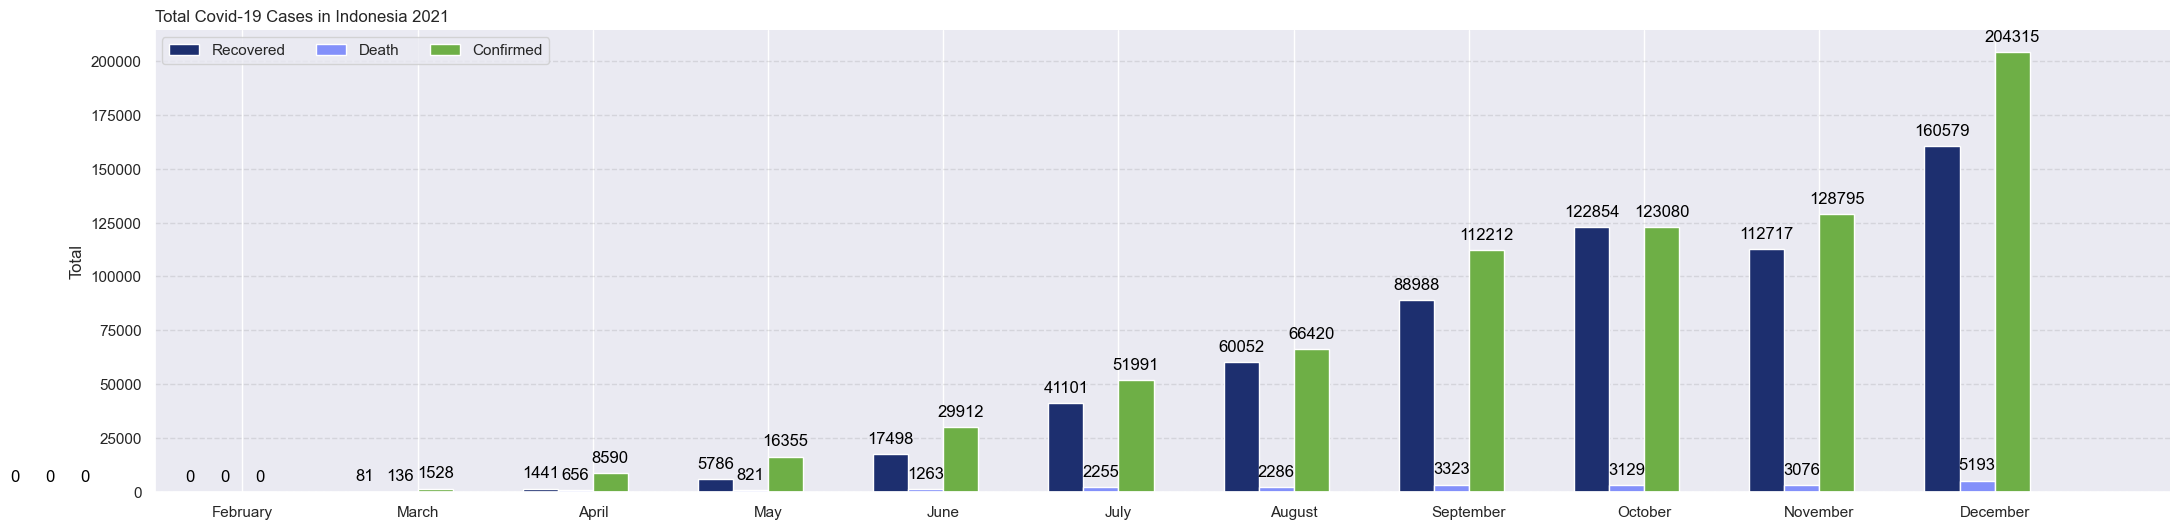

In [90]:
# Create a visualization for each type in each month over the year

import numpy as np
import matplotlib.pyplot as plt

# define figure
fig, ax = plt.subplots(1, figsize=(26, 6))

# numerical x
x = np.arange(0, len(show_data_group['month']))

# plot bars
bar_width = 0.2
plt.bar(x - 0.3, show_data_group['recovery'], width=bar_width, color='#1D2F6F')
plt.bar(x - 0.1, show_data_group['death'], width=bar_width, color='#8390FA')
plt.bar(x + 0.1, show_data_group['confirmed'], width=bar_width, color='#6EAF46')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x y details
plt.ylabel('Total')
plt.xticks(x, show_data_group['month'])
plt.xlim(0.5, 12)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# title and legend
plt.title('Total Covid-19 Cases in Indonesia 2021', loc='left')
plt.legend(['Recovered', 'Death', 'Confirmed'], loc='upper left', ncol=3)

# Add value labels
for i, val in enumerate(show_data_group['recovery']):
    plt.text(i - 0.3, val + 5000, str(val), color='black', ha='center')
for i, val in enumerate(show_data_group['death']):
    plt.text(i - 0.1, val + 5000, str(val), color='black', ha='center')
for i, val in enumerate(show_data_group['confirmed']):
    plt.text(i + 0.1, val + 5000, str(val), color='black', ha='center')

plt.show()

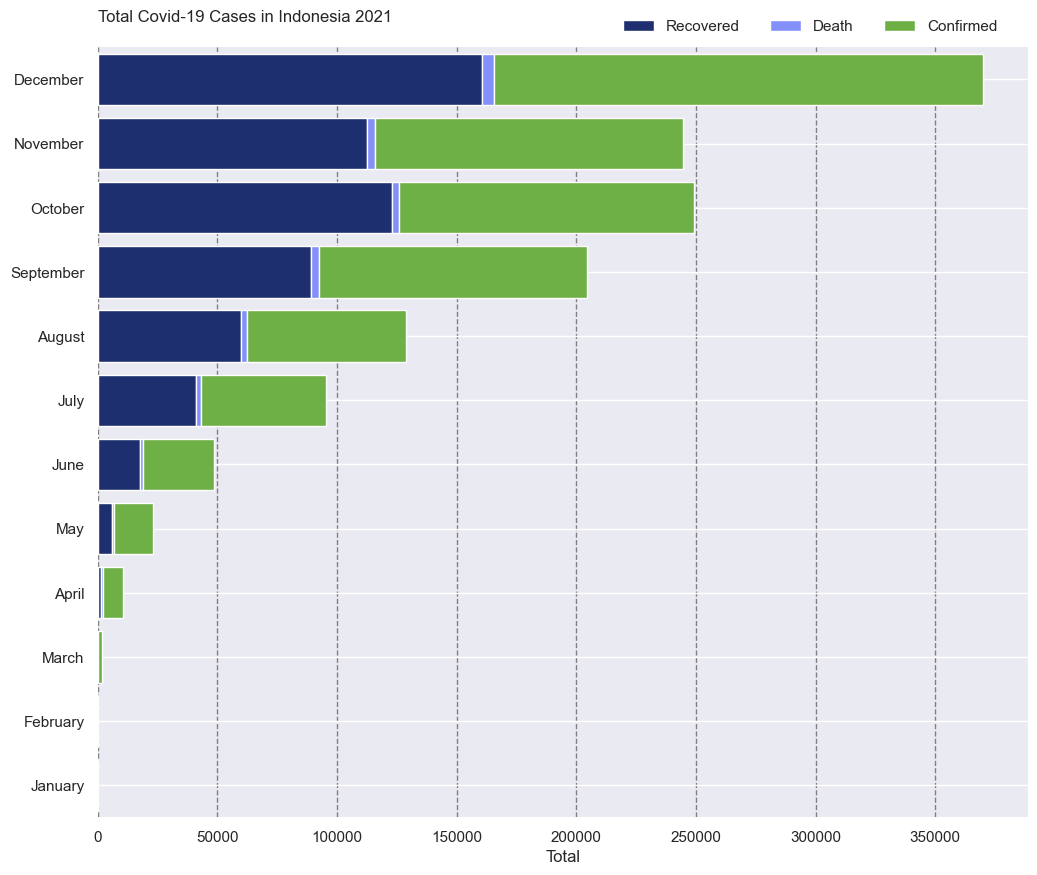

In [91]:
fields = ['recovery', 'death', 'confirmed']
colors = ['#1D2F6F', '#8390FA', '#6EAF46']
labels = ['Recovered', 'Death', 'Confirmed']

# Figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))

# Plot bars
left = len(show_data_group) * [0]
for idx, name in enumerate(fields):
    plt.barh(show_data_group['month'], show_data_group[name], left=left, color=colors[idx])
    left = left + show_data_group[name]

# Title, legend, labels
plt.title('Total Covid-19 Cases in Indonesia 2021\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total')

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

## Add value labels, uncomment code below to see value labels
# for i, (name, month) in enumerate(zip(fields, show_data_group['month'])):
#     for j, val in enumerate(show_data_group[name]):
#         plt.text(val, j, str(val), color='black', va='center')

plt.show()


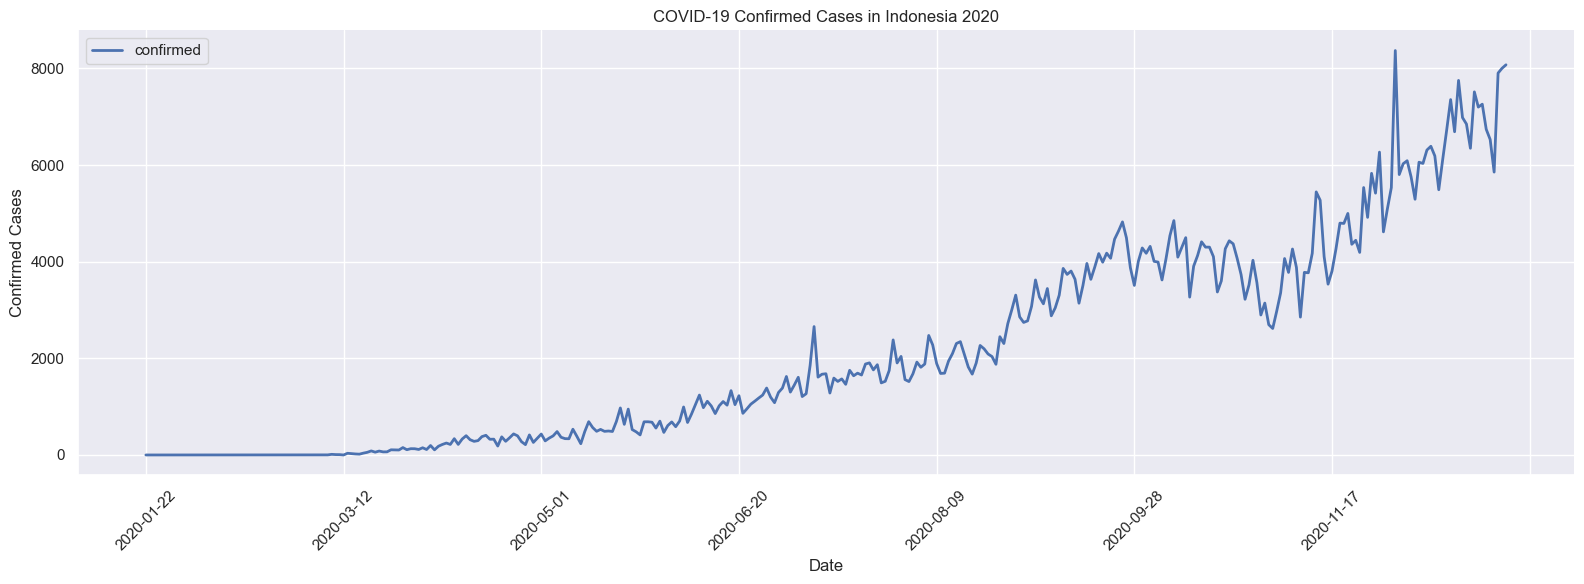

In [92]:
# Show trend of confirmed cases over the year

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='darkgrid')

# Plotting the data
fig, ax = plt.subplots(figsize=(16, 6))
show_data_pivot.set_index('date')[['confirmed']].plot(ax=ax, linewidth=2)

# Set the x-label and y-label
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

# Set the title
plt.title('COVID-19 Confirmed Cases in Indonesia 2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


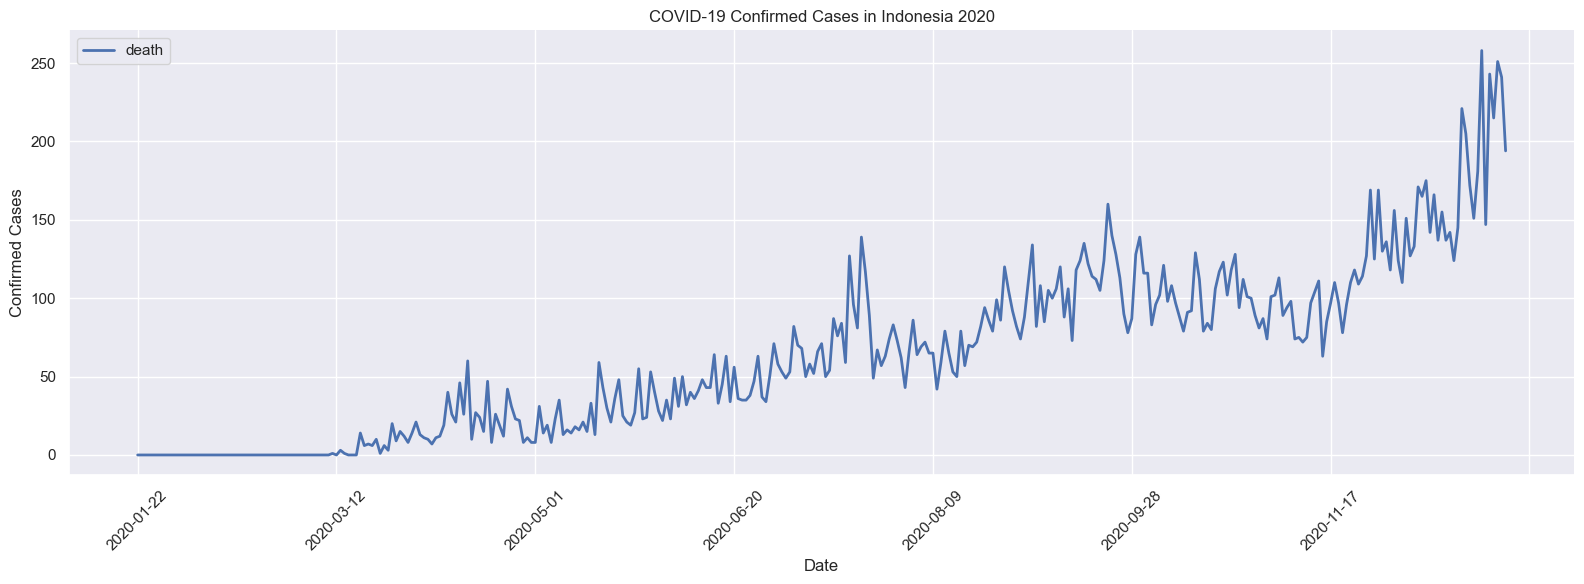

In [93]:
# Show trend of death cases over the year

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='darkgrid')

# Plotting the data
fig, ax = plt.subplots(figsize=(16, 6))
show_data_pivot.set_index('date')[['death']].plot(ax=ax, linewidth=2)

# Set the x-label and y-label
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

# Set the title
plt.title('COVID-19 Confirmed Cases in Indonesia 2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

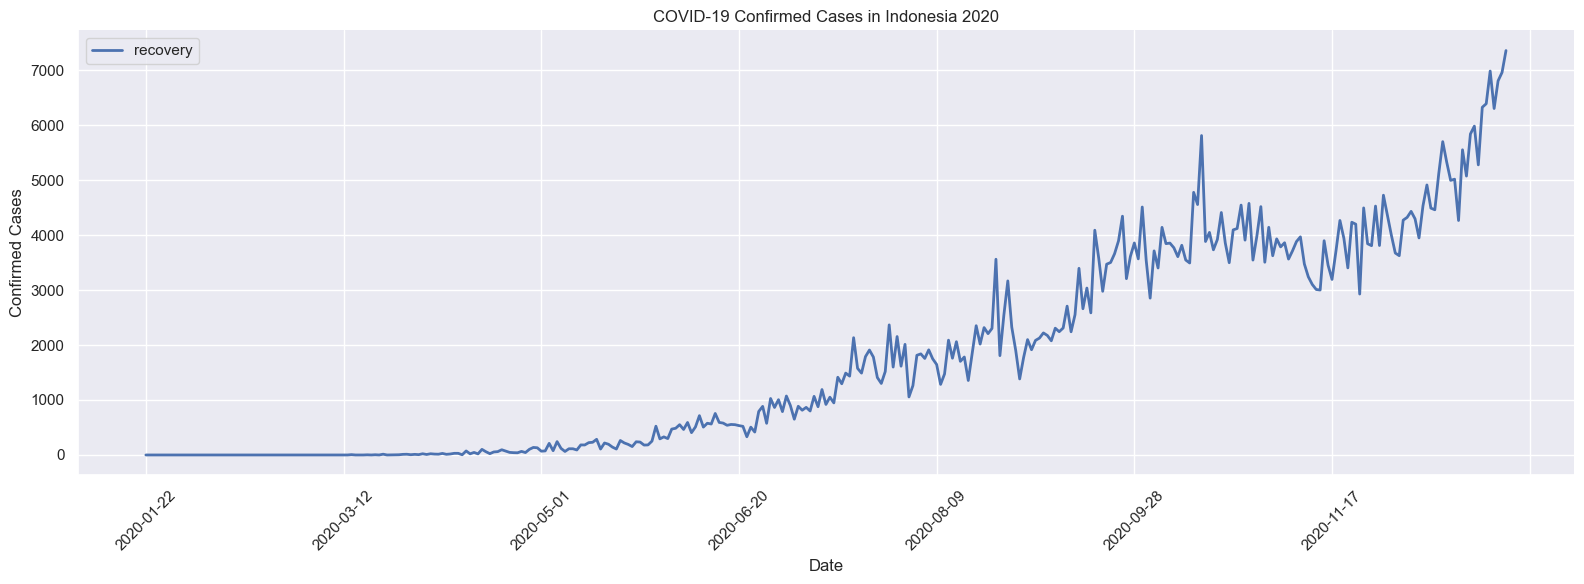

In [94]:
# Show trend of recovery cases over the year

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style='darkgrid')

# Plotting the data
fig, ax = plt.subplots(figsize=(16, 6))
show_data_pivot.set_index('date')[['recovery']].plot(ax=ax, linewidth=2)

# Set the x-label and y-label
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

# Set the title
plt.title('COVID-19 Confirmed Cases in Indonesia 2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper left')

# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
